# Debugging bias-variance with learning curves

In this notebook we build a couple of regression models as an excuse to explore learning and validation curves. These are powerful tools that tell us about the bias and variance in machine learning models.


This code was ported from Octave/Matlab to python and was part of the absolutely excellent [Machine Learning course](http://ml-class.org) by Stanford's [Andrew Ng](http://www.andrewng.org) on Coursera.
## Regularized Linear Regression and Bias v.s. Variance
In this exercise, you will implement regularized linear regression and use it to study models with dierent bias-variance properties. Before starting on the programming exercise, we strongly recommend watching the video lectures and completing the review questions for the associated topics.

### Regularized Linear Regression
In the first half of the exercise, you will implement regularized linear regression to predict the amount of water owing out of a dam using the change of water level in a reservoir. In the next half, you will go through some diagnostics of debugging learning algorithms and examine the effects of bias v.s. variance.

In [12]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
%matplotlib inline

Loading and Visualizing Data ...


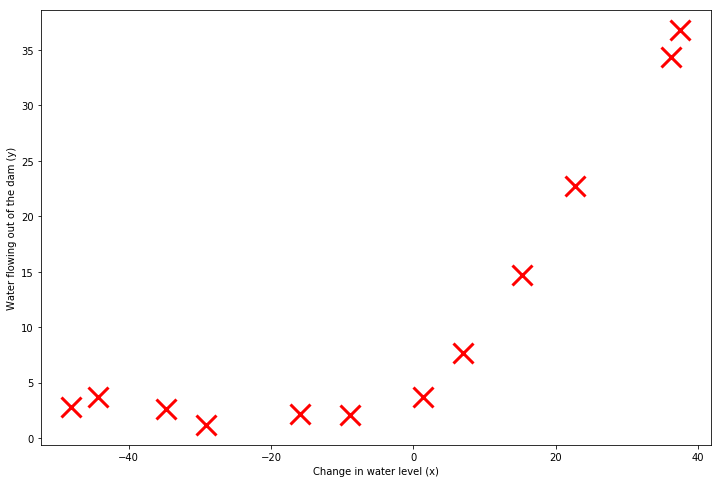

In [13]:
## =========== Part 1: Loading and Visualizing Data =============
#  We start the exercise by first loading and visualizing the dataset. 
#  The following code will load the dataset into your environment and plot
#  the data.
#

# Load Training Data
print('Loading and Visualizing Data ...')

mat = scipy.io.loadmat('data/ex5data1.mat')

X = mat["X"]
y = mat["y"]
Xval = mat["Xval"]
yval = mat["yval"]
Xtest = mat["Xtest"]
ytest = mat["ytest"]

m = X.shape[0]


# Plot training data
plt.figure(figsize=(12,8))
#plt.plot(X, y, 'rx', markersize=10, linewidth=1.5)
plt.plot(X, y, 'rx', markersize=20, mew=3)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.show(block=False)

Now we implement linear regression with a regularized cost function and evaluate the cost and gradient values with fixed theta parameters.

In [14]:
def linearRegCostFunction(X, y, theta, lambda_val, return_grad=False):
    #LINEARREGCOSTFUNCTION Compute cost and gradient for regularized linear 
    #regression with multiple variables
    #   [J, grad] = LINEARREGCOSTFUNCTION(X, y, theta, lambda_val) computes the 
    #   cost of using theta as the parameter for linear regression to fit the 
    #   data points in X and y. Returns the cost in J and the gradient in grad

    # Initialize some useful values
    m = len(y) # number of training examples

    # force to be 2D vector
    theta = np.reshape(theta, (-1,y.shape[1]))

    # You need to return the following variables correctly 
    J = 0
    grad = np.zeros(theta.shape)

    # ====================== YOUR CODE HERE ======================
    # Instructions: Compute the cost and gradient of regularized linear 
    #               regression for a particular choice of theta.
    #
    #               You should set J to the cost and grad to the gradient.
    #

    # cost function
    J = ( 1./(2*m)) * np.power( (np.dot(X, theta) - y) , 2).sum() + ( float(lambda_val) / (2*m)) * np.power(theta[1:theta.shape[0]],2).sum()

    grad_no_regularization = (1./m) * np.dot( X.T, np.dot(X,theta) - y)
    # regularized gradient
    grad = grad_no_regularization + ( float(lambda_val) / m )*theta

    # unregularize first gradient
   
    grad[0] = grad_no_regularization[0]

    if return_grad == True:
        return J, grad.flatten()
    elif return_grad == False:
        return J 

In [18]:
## =========== Part 2: Regularized Linear Regression Cost =============
#  You should now implement the cost function for regularized linear 
#  regression. 
#

theta = np.array([[1] , [1]])
X_padded = np.column_stack((np.ones((m,1)), X))
J,grad  = linearRegCostFunction(X_padded, y, theta, 1,True)

print('Cost at theta = [1 ; 1]: {:f}\n(this value should be about 303.993192)\n'.format(J))

Cost at theta = [1 ; 1]: 303.993192
(this value should be about 303.993192)



In [19]:
## =========== Part 3: Regularized Linear Regression Gradient =============
#  You should now implement the gradient for regularized linear 
#  regression.
#

theta = np.array([[1] , [1]])
J, grad = linearRegCostFunction(X_padded, y, theta, 1, True)

print('Gradient at theta = [1 ; 1]:  [{:f}; {:f}] \n(this value should be about [-15.303016; 598.250744])'.format(grad[0], grad[1]))


Gradient at theta = [1 ; 1]:  [-15.303016; 598.250744] 
(this value should be about [-15.303016; 598.250744])


Remember that regularization with the lambda_val regularization term helps prevent overfitting by penalizing the cost J. As the parameters in theta increase, the penalty increases as well. Smaller parameters results in
* simpler hypothesis
* a smoother function

This makes overfitting more difficult! At the same time, note that if lambda_val is too large, we force our parameters close to 0 and end up with an an oversimplified, model-assumption trusting, data-ignoring, underfit hypothesis.

We now fit a linear regression model with trainLinearReg():


In [20]:
def trainLinearReg(X, y, lambda_val):
    #TRAINLINEARREG Trains linear regression given a dataset (X, y) and a
    #regularization parameter lambda_val
    #   [theta] = TRAINLINEARREG (X, y, lambda_val) trains linear regression using
    #   the dataset (X, y) and regularization parameter lambda_val. Returns the
    #   trained parameters theta.
    #

    # Initialize Theta
    initial_theta = np.zeros((X.shape[1], 1))

    # Short hand for cost function to be minimized
    def costFunc(theta):
        return linearRegCostFunction(X, y, theta, lambda_val, True)

    # Now, costFunction is a function that takes in only one argument
    maxiter = 200
    results = opt.minimize(costFunc, x0=initial_theta,  method="L-BFGS-B", jac=True,
                           options={'disp': True, 'maxiter':maxiter})

    theta = results["x"]

    return theta

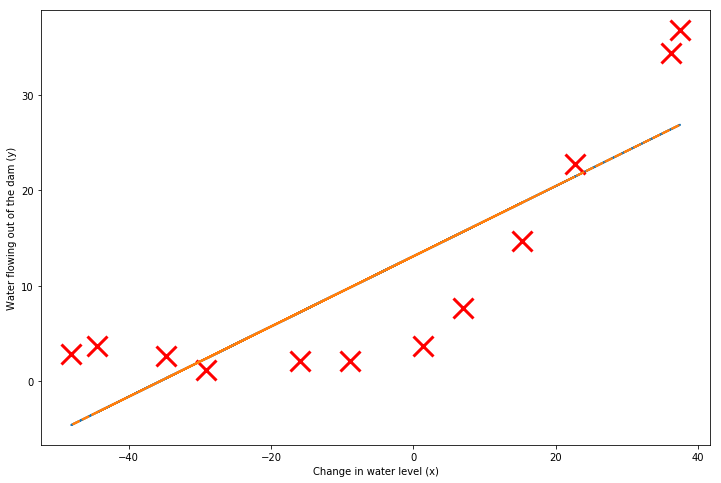

In [22]:
## =========== Part 4: Train Linear Regression =============
#  Once you have implemented the cost and gradient correctly, the
#  trainLinearReg function will use your cost function to train 
#  regularized linear regression.
# 
#  Write Up Note: The data is non-linear, so this will not give a great 
#                 fit.
#

#  Train linear regression with lambda = 0
lambda_val = 0
theta = trainLinearReg(X_padded, y, lambda_val)


# resets plot
plt.clf()
plt.close()

#  Plot fit over the data
plt.close()
plt.figure(figsize=(12,8))
plt.plot(X, np.dot(np.column_stack((np.ones((m,1)), X)), theta), '-', linewidth=2)
plt.plot(X, y, 'rx', markersize=20, mew=3)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.plot(X, np.dot(np.column_stack((np.ones((m,1)), X)), theta), '--', linewidth=2)
plt.show(block=False)

It's visually clear that this linear model is a bad fit to the data: the data points don't have a linear pattern. Learning curves will confirm that and make it easy to debug models where the data and fitted models are not as easy to visualize.

## Learning curves as bias-variance diagnostics

Learning curves plot training and validation error as a function of trainng set size. That is, as we get more data, they show how a model trained on that data fares against the same data points it trained on vs. against the validation set. 

Learning curves can be extremely useful in diagnosing machine learning models as they allow us to diagnose bias and variance errors.

Below we graph the learning curves for the linear regression we've worked with so far:

In [23]:
def learningCurve(X, y, Xval, yval, lambda_val):
    #LEARNINGCURVE Generates the train and cross validation set errors needed 
    #to plot a learning curve
    #   [error_train, error_val] = ...
    #       LEARNINGCURVE(X, y, Xval, yval, lambda_val) returns the train and
    #       cross validation set errors for a learning curve. In particular, 
    #       it returns two vectors of the same length - error_train and 
    #       error_val. Then, error_train(i) contains the training error for
    #       i examples (and similarly for error_val(i)).
    #
    #   In this function, you will compute the train and test errors for
    #   dataset sizes from 1 up to m. In practice, when working with larger
    #   datasets, you might want to do this in larger intervals.
    #

    # Number of training examples
    m = len(X)

    # You need to return these values correctly
    error_train = np.zeros((m, 1))
    error_val   = np.zeros((m, 1))

    for i in range(1,m+1):

        # define training variables for this loop
        X_train = X[:i]
        y_train = y[:i]

        # learn theta parameters with current X_train and y_train
        theta = trainLinearReg(X_train, y_train, lambda_val)

        # fill in error_train(i) and error_val(i)
        #   note that for error computation, we set lambda_val = 0 in the last argument
        error_train[i-1] = linearRegCostFunction(X_train, y_train, theta, 0)
        error_val[i-1]   = linearRegCostFunction(Xval   , yval   , theta, 0)
                
    return error_train, error_val

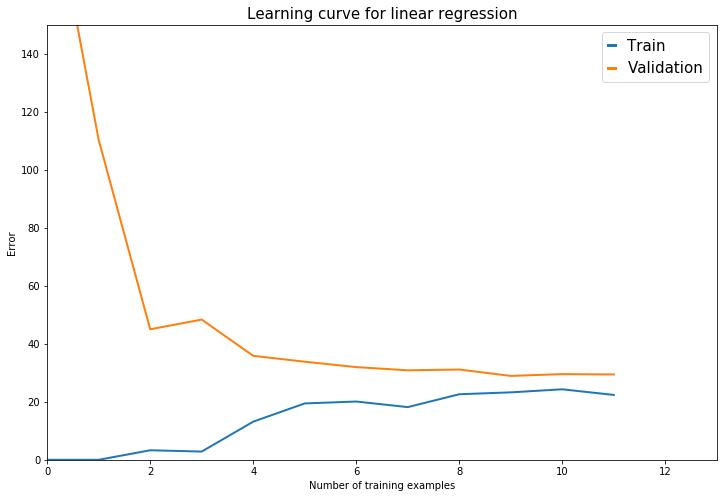

# Training Examples	Train Error	Cross Validation Error

  	1		0.000000	205.121096

  	2		0.000000	110.300366

  	3		3.286595	45.010231

  	4		2.842678	48.368911

  	5		13.154049	35.865165

  	6		19.443963	33.829962

  	7		20.098522	31.970986

  	8		18.172859	30.862446

  	9		22.609405	31.135998

  	10		23.261462	28.936207

  	11		24.317250	29.551432

  	12		22.373906	29.433818



In [32]:
## =========== Part 5: Learning Curve for Linear Regression =============
#  Next, you should implement the learningCurve function. 
#
#  Write Up Note: Since the model is underfitting the data, we expect to
#                 see a graph with "high bias" -- slide 8 in ML-advice.pdf 
#

lambda_val = 0
error_train, error_val = learningCurve(np.column_stack((np.ones((m,1)), X)), y, np.column_stack((np.ones((Xval.shape[0], 1)), Xval)), yval, lambda_val)


# resets plot 
plt.close()

plt.close()
plt.figure(figsize=(12,8))

p1, p2 = plt.plot(range(m), error_train, range(m), error_val, linewidth=2)
plt.title('Learning curve for linear regression', fontsize=15)
legend = plt.legend((p1, p2), ('Train', 'Validation'), numpoints=1, handlelength=0.5, fontsize=15)
for label in legend.get_lines():
    label.set_linewidth(3)
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.axis([0, 13, 0, 150])
plt.show()

print('# Training Examples\tTrain Error\tCross Validation Error\n')
for i in range(m):
    print('  \t{:d}\t\t{:f}\t{:f}\n'.format(i+1, float(error_train[i]), float(error_val[i])))

The learning curves, which show the error or cost of the model, get close to each other with more training data. At the same time, note that the error is very high for both of them. These two observations indicate that the model has a high bias - its hypothesis is too simple to fit the data properly, and the algorithm weighs its hypothesis more than the data when making predictions.

## More complex regression

We need a model with more features to closer fit our data. 

Polynomial regression allows us to increase the complexity of the model by defining our own features. These new features define a nonlinear relationship between the training data and the output variables - an n-th degree polynomial.

In our case, the new features are powers of the original features. e.g. 

* feature1 = waterLevel
* feature2 = waterLevel$^{2}$
* feature3 = waterLevel$^{3}$
* ...
* featureN = waterLevel$^{N}$

Because we're using powers, it's important to normalize our features so that the numerical optimization works in an efficient manner (or at all).

We obtain polynomial features for the training, test and validation set with the code below.

In [34]:
def polyFeatures(X, p):
    #POLYFEATURES Maps X (1D vector) into the p-th power
    #   [X_poly] = POLYFEATURES(X, p) takes a data matrix X (size m x 1) and
    #   maps each example into its polynomial features where
    #   X_poly(i, :) = [X(i) X(i).^2 X(i).^3 ...  X(i).^p];
    #


    # You need to return the following variables correctly.
    # X_poly = np.zeros((X.size, p))

    # ====================== YOUR CODE HERE ======================
    # Instructions: Given a vector X, return a matrix X_poly where the p-th 
    #               column of X contains the values of X to the p-th power.
    #
    # 

    # initialize X_poly to be equal to the single-column X
    X_poly = X
    # if p is equal or greater than 2
    if p >= 2:

        # for each number between column 2 (index 1) and last column
        for k in range(1,p):

            # add k-th column of polynomial features where k-th column is X.^k
            X_poly = np.column_stack((X_poly, np.power(X,k+1)))
            

    return X_poly
def featureNormalize(X):
    #FEATURENORMALIZE Normalizes the features in X 
    #   FEATURENORMALIZE(X) returns a normalized version of X where
    #   the mean value of each feature is 0 and the standard deviation
    #   is 1. This is often a good preprocessing step to do when
    #   working with learning algorithms.

    mu = np.mean(X, axis=0)
    X_norm = X - mu

    sigma = np.std(X_norm, axis=0)
    X_norm = X_norm/sigma

    return X_norm, mu, sigma

In [36]:
## =========== Part 6: Feature Mapping for Polynomial Regression =============
#  One solution to this is to use polynomial regression. You should now
#  complete polyFeatures to map each example into its powers
#

p = 8;

# Map X onto Polynomial Features and Normalize
X_poly = polyFeatures(X, p)
X_poly, mu, sigma = featureNormalize(X_poly)  # Normalize
X_poly = np.column_stack((np.ones((m,1)), X_poly)) # Add Ones

# # Map X_poly_test and normalize (using mu and sigma)
X_poly_test = polyFeatures(Xtest, p)
X_poly_test = X_poly_test - mu
X_poly_test = X_poly_test / sigma
X_poly_test = np.column_stack((np.ones((X_poly_test.shape[0],1)), X_poly_test)) # Add Ones

# # Map X_poly_val and normalize (using mu and sigma)
X_poly_val = polyFeatures(Xval, p)
X_poly_val = X_poly_val - mu
X_poly_val = X_poly_val / sigma
X_poly_val = np.column_stack((np.ones((X_poly_val.shape[0],1)), X_poly_val)) # Add Ones

print('Normalized Training Example 1:')
print('  {:s}  '.format(str(X_poly[0, :])))

Normalized Training Example 1:
  [ 1.         -0.3782437  -0.78866232  0.19032872 -0.7375913   0.32025197
 -0.6171516   0.35983501 -0.53109126]  


Note that even with polynomial features, we still perform linear regression optimization on them.

## Unregularized polynomial regression

Below, we can see the polynomial fit on the data and its learning curves. We set ``lambda_val=0`` to graph unregularized polynomial regression for now.

Note that the graph below will vary depending on the numerical optimization function you use in ``trainLinearReg()``. Here, we use [scipy.optimize.minimize](https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.optimize.minimize.html).

In [47]:
def plotFit(min_x, max_x, mu, sigma, theta, p):
    #PLOTFIT Plots a learned polynomial regression fit over an existing figure.
    #Also works with linear regression.
    #   PLOTFIT(min_x, max_x, mu, sigma, theta, p) plots the learned polynomial
    #   fit with power p and feature normalization (mu, sigma).

    # We plot a range slightly bigger than the min and max values to get
    # an idea of how the fit will vary outside the range of the data points
    x = np.array(np.arange(min_x - 15, max_x + 25, 0.05)) # 1D vector

    # Map the X values 
    X_poly = polyFeatures(x, p)
    X_poly = X_poly - mu
    X_poly = X_poly/sigma

    # Add ones
    X_poly = np.column_stack((np.ones((x.shape[0],1)), X_poly))

    # Plot
    plt.plot(x, np.dot(X_poly, theta), '--', linewidth=2)

In [78]:

def plotPolyReg(lambda_val=1):
    lambda_val = 1;
    theta = trainLinearReg(X_poly, y, lambda_val)

    # Plot training data and fit
    # resets plot 
    plt.close()
    plt.close()
    plt.figure(figsize=(12,8))

    plt.plot(X, y, 'rx', markersize=10, mew=3)
    plotFit(min(X), max(X), mu, sigma, theta, p)
    plt.xlabel('Change in water level (x)') 
    plt.ylabel('Water flowing out of the dam (y)')
    plt.title ('Polynomial Regression Fit (lambda = {:f})'.format(lambda_val))

    plt.show()


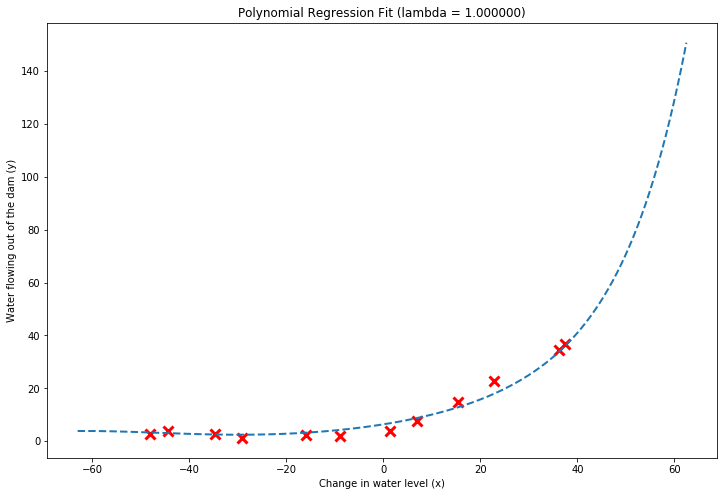

In [81]:
## =========== Part 7: Learning Curve for Polynomial Regression =============
#  Now, you will get to experiment with polynomial regression with multiple
#  values of lambda. The code below runs polynomial regression with 
#  lambda = 0. You should try running the code with different values of
#  lambda to see how the fit and learning curve change.
#
plotPolyReg(lambda_val=0.)

This model fits the data very well. Too well, perhaps. Without regularization, overfitting is somewhat evident in the graph above in how the values dramatically shoot up or down a short distance from the data (notice the scale of the y axis!).

The high variance of the model makes it resemble the data it's trained on too closely, making the model generalize poorly.

We can diagnose high variance with learning curves given that the validation error stays high even as we train with more data. Another indication of high variance in the learning curves is that the training error is at or close to 0 given how tightly overfit the model is.

In [76]:
def plotPolyLearningCurves(lambda_val=1.):
    error_train, error_val = learningCurve(X_poly, y, X_poly_val, yval, lambda_val)

    plt.close()
    plt.figure(figsize=(12,8))
    p1, p2 = plt.plot(range(1,m+1), error_train, range(1,m+1), error_val, linewidth=2)

    plt.axis([0, 13, 0, 100])
    legend = plt.legend((p1, p2), ('Train', 'Validation'), fontsize=15)
    for label in legend.get_lines():
        label.set_linewidth(3)
    plt.title('Polynomial Regression Learning Curve (lambda = {:f})'.format(lambda_val), fontsize=15)
    plt.xlabel('Number of training examples', fontsize=15)
    plt.ylabel('Error', fontsize=15)
    plt.show()

    print('Polynomial Regression (lambda = {:f})\n\n'.format(lambda_val))
    print('# Training Examples\tTrain Error\tValidation Error\n')
    for i in range(m):
        print('  \t{:d}\t\t{:f}\t{:f}\n'.format(i+1, float(error_train[i]), float(error_val[i])))

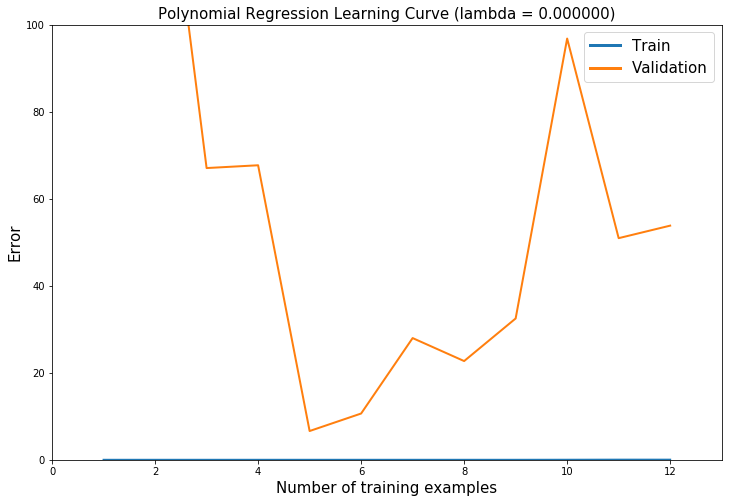

Polynomial Regression (lambda = 0.000000)


# Training Examples	Train Error	Validation Error

  	1		0.000000	161.442168

  	2		0.000000	160.792306

  	3		0.000000	67.085334

  	4		0.000000	67.726856

  	5		0.000000	6.617001

  	6		0.000000	10.641948

  	7		0.000000	27.990140

  	8		0.000000	22.704571

  	9		0.000258	32.498510

  	10		0.010818	96.865493

  	11		0.031219	50.966465

  	12		0.028890	53.844821



In [82]:
plotPolyLearningCurves(lambda_val=0)

## Regularized polynomial regression

We can try different values for ``lambda_val`` and, with the help of learning curves, see the effects of regularization on our model. We start with ``lambda_val=1``:

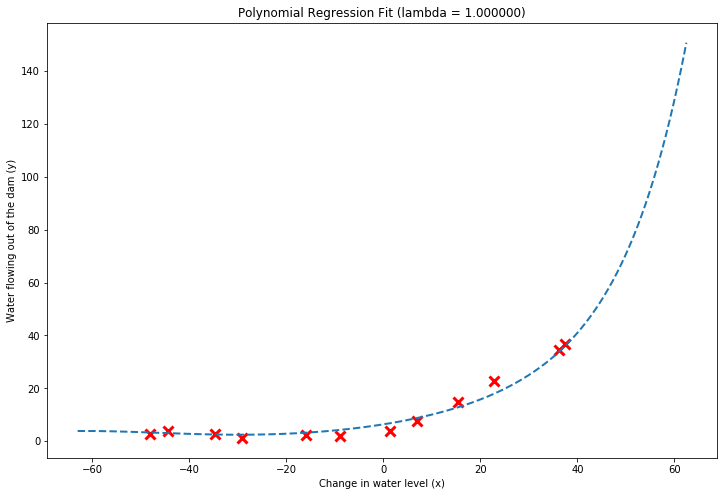

In [83]:
plotPolyReg(lambda_val=1.)

We can see the the model beyond our data doesn't have violent changes up our down. We seem to have balanced variance error - the model is no longer oversensitive to each data point - with the bias error - the model's assumption that the data has a polynomial behaviour is not too far off. 

Learning curves confirm that this regularized model is a decent fit. As we increase the training data size, we see lower error values for both the validation and training data. Both errors are also close to 0 (but not too much).

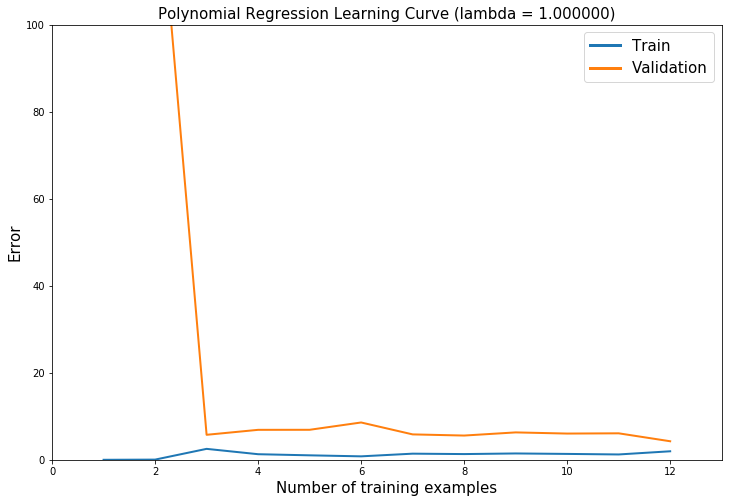

Polynomial Regression (lambda = 1.000000)


# Training Examples	Train Error	Validation Error

  	1		0.000000	138.846731

  	2		0.042839	143.502495

  	3		2.515217	5.749648

  	4		1.285542	6.890110

  	5		1.028307	6.900155

  	6		0.794844	8.581363

  	7		1.409964	5.842339

  	8		1.316231	5.575941

  	9		1.458736	6.300211

  	10		1.353304	6.033562

  	11		1.228546	6.089839

  	12		1.958697	4.263453



In [67]:
plotPolyLearningCurves(lambda_val=1)

This model, like our initial (nonpolynomial) linear regression, has high bias - it trusts its assumptions too much and doesn't fit the data closely. As before, we see converging train and validation data errors that are both too high.

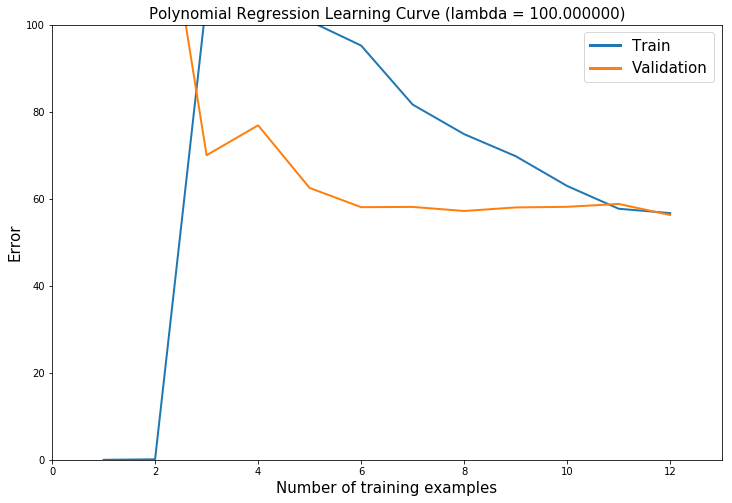

Polynomial Regression (lambda = 100.000000)


# Training Examples	Train Error	Validation Error

  	1		0.000000	138.846777

  	2		0.113986	144.124029

  	3		105.959154	70.036422

  	4		119.945285	76.910566

  	5		100.886412	62.513581

  	6		95.257984	58.095056

  	7		81.687969	58.149081

  	8		74.884577	57.213744

  	9		69.819836	58.029974

  	10		62.963981	58.171676

  	11		57.731688	58.833223

  	12		56.725813	56.287752



In [68]:
plotPolyLearningCurves(lambda_val=100.)

## Picking the regularization term automatically using the validation set

Given how much ``lambda_val`` can change the performance of our model, we want to explore a few possible values for it and pick the best one. Doing this automatically (and visually) is even better.

We explore the following range of values for ``lambda_val`` {0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10} and graph their training and validation errors. We'll then look to see which value of ``lambda_val`` has the lowest error for both trainig and validation data.

In [69]:
def validationCurve(X, y, Xval, yval):
    #VALIDATIONCURVE Generate the train and validation errors needed to
    #plot a validation curve that we can use to select lambda
    #   [lambda_vec, error_train, error_val] = ...
    #       VALIDATIONCURVE(X, y, Xval, yval) returns the train
    #       and validation errors (in error_train, error_val)
    #       for different values of lambda. You are given the training set (X,
    #       y) and validation set (Xval, yval).
    #

    # Selected values of lambda (you should not change this)
    lambda_vec = np.array([0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10])

    # You need to return these variables correctly.
    error_train = np.zeros((len(lambda_vec), 1))
    error_val = np.zeros((len(lambda_vec), 1))

    # ====================== YOUR CODE HERE ======================
    # Instructions: Fill in this function to return training errors in 
    #               error_train and the validation errors in error_val. The 
    #               vector lambda_vec contains the different lambda parameters 
    #               to use for each calculation of the errors, i.e, 
    #               error_train(i), and error_val(i) should give 
    #               you the errors obtained after training with 
    #               lambda = lambda_vec(i)
    #
    # Note: You can loop over lambda_vec with the following:
    #
    #       for i = 1:length(lambda_vec)
    #           lambda = lambda_vec(i);
    #           # Compute train / val errors when training linear 
    #           # regression with regularization parameter lambda
    #           # You should store the result in error_train(i)
    #           # and error_val(i)
    #           ....
    #           
    #       end
    #
    #

    for i in range(len(lambda_vec)):

        lambda_val = lambda_vec[i]

        # learn theta parameters with current lambda value
        theta = trainLinearReg(X, y, lambda_val)

        # fill in error_train[i] and error_val[i]
        #   note that for error computation, we set lambda = 0 in the last argument
        error_train[i] = linearRegCostFunction(X,    y,    theta, 0)
        error_val[i]   = linearRegCostFunction(Xval, yval, theta, 0)
         
    return lambda_vec, error_train, error_val

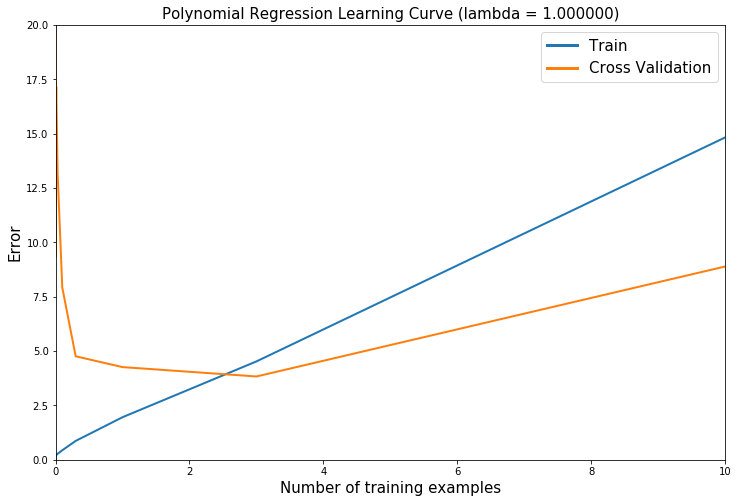

lambda		Train Error	Validation Error
 0.000000	[0.02889026]	[53.84482111]

 0.001000	[0.10797431]	[9.34955348]

 0.003000	[0.16671318]	[15.92121236]

 0.010000	[0.21795797]	[17.14931465]

 0.030000	[0.27514865]	[13.21618293]

 0.100000	[0.4386562]	[7.92682617]

 0.300000	[0.86820925]	[4.76073244]

 1.000000	[1.95869712]	[4.26345252]

 3.000000	[4.52510055]	[3.83218395]

 10.000000	[14.82577991]	[8.88969678]



In [70]:
## =========== Part 8: Validation for Selecting Lambda =============
#  You will now implement validationCurve to test various values of 
#  lambda on a validation set. You will then use this to select the
#  "best" lambda value.
#

lambda_vec, error_train, error_val = validationCurve(X_poly, y, X_poly_val, yval)

plt.close()
plt.figure(figsize=(12,8))
p1, p2 = plt.plot(lambda_vec, error_train, lambda_vec, error_val, linewidth=2)

plt.axis([0, 10, 0, 20])
legend = plt.legend((p1, p2), ('Train', 'Cross Validation'), fontsize=15)
for label in legend.get_lines():
    label.set_linewidth(3)
plt.title('Polynomial Regression Learning Curve (lambda = {:f})'.format(lambda_val), fontsize=15)
plt.xlabel('Number of training examples', fontsize=15)
plt.ylabel('Error', fontsize=15)
plt.show()

print('lambda\t\tTrain Error\tValidation Error')
for i in range(len(lambda_vec)):
    #print(lambda_vec[i],'\t', error_train[i],'\t', error_val[i])
    print(' {:f}\t{:s}\t{:s}\n'.format(lambda_vec[i], str(error_train[i]), str(error_val[i])))

The lowest validation error happens when ``lambda_val=3``, which is the optimal choice from the range explored.

## Evaluating tuned model on test set

Now that we have tuned the ``lambda_val`` value with the validation set, we can finally use it to compute the error on the test set. It should be around 3.8599.

In [71]:
## =========== Part 9: Computing test set error on the best lambda found =============
#

# best lambda value from previous step
lambda_val = 3;

# note that we're using X_poly - polynomial linear regression with polynomial features
theta = trainLinearReg(X_poly, y, lambda_val)

# because we're using X_poly, we also have to use X_poly_test with polynomial features
error_test = linearRegCostFunction(X_poly_test, ytest, theta, 0)
print('Test set error: {:f}\n'.format(error_test)) # expected 3.859

Test set error: 3.572020



Even better! 

## Learning curves with randomly selected examples

With such a small learning set, it often helps to plot learning curves with the average of different randomly selected data from your training and validation set.

For $i$ examples, we randomply pick $i$ data points from the training set and $i$ data points from the validation set. We learn the regression parameters using the chosen training set, and then evaluate the error of those parameters with the same training set and with the chosen validation set. We repeat this many times (50 in our case) and use the averaged error as the training and validation error for $i$ examples.

The graphs below show averaged learning curves with randomly picked examples for ``lambda_val=0.01`` and the previously chosen ``lambda_val=3``.

In [73]:
def plotLearningCurvesRandomEx(lambda_val=1., times=50):
   

    # lambda_val value for this step
    lambda_val = 0.01

    # number of iterations
    times = 50

    # initialize error matrices
    error_train_rand = np.zeros((m, times))
    error_val_rand   = np.zeros((m, times))

    for i in range(1,m+1):

        for k in range(times):

            # choose i random training examples
            rand_sample_train = np.random.permutation(X_poly.shape[0])
            rand_sample_train = rand_sample_train[:i]

            # choose i random cross validation examples
            rand_sample_val   = np.random.permutation(X_poly_val.shape[0])
            rand_sample_val   = rand_sample_val[:i]

            # define training and cross validation sets for this loop
            X_poly_train_rand = X_poly[rand_sample_train,:]
            y_train_rand      = y[rand_sample_train]
            X_poly_val_rand   = X_poly_val[rand_sample_val,:]
            yval_rand         = yval[rand_sample_val]

    #         print(X_poly_train_rand.shape)
    #         print(y_train_rand.shape)     
    #         print(X_poly_val_rand.shape)  
    #         print(yval_rand.shape)               

            # note that we're using X_poly_train_rand and y_train_rand in training
            theta = trainLinearReg(X_poly_train_rand, y_train_rand, lambda_val)

            # we use X_poly_train_rand, y_train_rand, X_poly_train_rand, X_poly_val_rand
            error_train_rand[i-1,k] = linearRegCostFunction(X_poly_train_rand, y_train_rand, theta, 0)
            error_val_rand[i-1,k]   = linearRegCostFunction(X_poly_val_rand,   yval_rand,    theta, 0)


    error_train = np.mean(error_train_rand, axis=1)
    error_val   = np.mean(error_val_rand, axis=1)

    # resets plot 
    plt.close()
    plt.figure(figsize=(12,8))
    p1, p2 = plt.plot(range(m), error_train, range(m), error_val)
    plt.title('Polynomial Regression Learning Curve (lambda = {:f})'.format(lambda_val))
    plt.legend((p1, p2), ('Train', 'Cross Validation'))
    for label in legend.get_lines():
        label.set_linewidth(3)
    plt.xlabel('Number of training examples')
    plt.ylabel('Error')
    plt.axis([0, 13, 0, 150])
    plt.show(block=False)


    print('# Training Examples\tTrain Error\tCross Validation Error\n')
    for i in range(m):
        print('  \t{:d}\t\t{:f}\t{:f}\n'.format(i+1, error_train[i], error_val[i]))


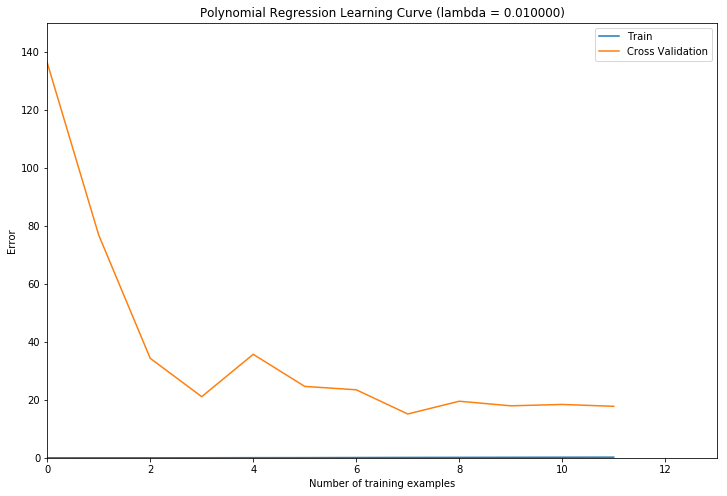

# Training Examples	Train Error	Cross Validation Error

  	1		0.000000	136.306525

  	2		0.004695	76.828834

  	3		0.008438	34.320558

  	4		0.019329	21.082212

  	5		0.049989	35.693177

  	6		0.060160	24.625245

  	7		0.096725	23.457761

  	8		0.127084	15.112045

  	9		0.148138	19.512381

  	10		0.173531	17.931032

  	11		0.197372	18.401492

  	12		0.217958	17.757621



In [75]:
 ## =========== Part 10: Plot learning curves with randomly selected examples =============
plotLearningCurvesRandomEx(0.01)

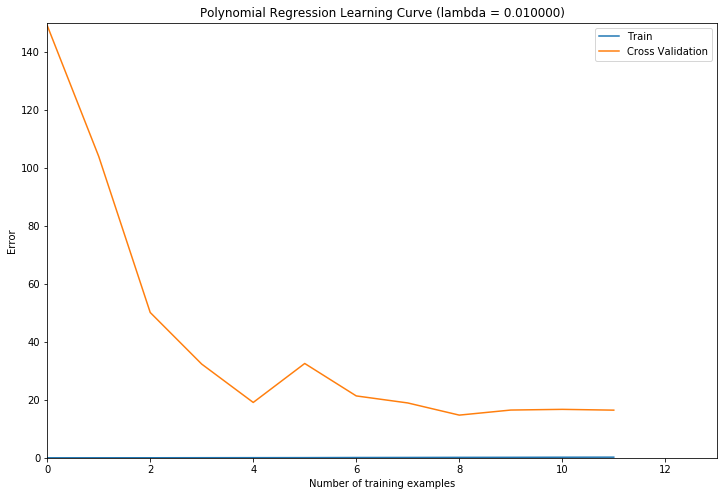

# Training Examples	Train Error	Cross Validation Error

  	1		0.000000	149.122275

  	2		0.010039	103.969975

  	3		0.014279	50.124842

  	4		0.032969	32.319515

  	5		0.048553	19.093303

  	6		0.061068	32.532752

  	7		0.102456	21.344677

  	8		0.121631	18.918391

  	9		0.152226	14.723704

  	10		0.166490	16.471257

  	11		0.197959	16.708566

  	12		0.217958	16.435744



In [84]:
plotLearningCurvesRandomEx(3)